In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
%matplotlib inline

In [5]:
loans = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\15-Decision-Trees-and-Random-Forests\\loan_data.csv")

In [6]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [10]:
loans = pd.concat([loans, pd.get_dummies(loans['purpose'])], axis = 1)

In [11]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,...,0,0,1,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,...,0,0,1,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,...,0,0,1,0,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,...,0,0,1,0,0,0,0,1,0,0


In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 21 columns):
credit.policy         9578 non-null int64
purpose               9578 non-null object
int.rate              9578 non-null float64
installment           9578 non-null float64
log.annual.inc        9578 non-null float64
dti                   9578 non-null float64
fico                  9578 non-null int64
days.with.cr.line     9578 non-null float64
revol.bal             9578 non-null int64
revol.util            9578 non-null float64
inq.last.6mths        9578 non-null int64
delinq.2yrs           9578 non-null int64
pub.rec               9578 non-null int64
not.fully.paid        9578 non-null int64
all_other             9578 non-null uint8
credit_card           9578 non-null uint8
debt_consolidation    9578 non-null uint8
educational           9578 non-null uint8
home_improvement      9578 non-null uint8
major_purchase        9578 non-null uint8
small_business        9578 non-null uint

In [13]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([  2.,   1.,   1.,   1.,   5.,   5., 102., 112., 131., 127., 108.,
        121., 102., 104., 111., 116.,  91.,  79.,  84.,  74.,  60.,  70.,
         52.,  57.,  44.,  44.,   9.,   6.,   7.,   8.,   8.,   5.,   3.,
          2.,   2.,   1.,   3.,   1.,   6.,   3.]),
 array([612.   , 616.875, 621.75 , 626.625, 631.5  , 636.375, 641.25 ,
        646.125, 651.   , 655.875, 660.75 , 665.625, 670.5  , 675.375,
        680.25 , 685.125, 690.   , 694.875, 699.75 , 704.625, 709.5  ,
        714.375, 719.25 , 724.125, 729.   , 733.875, 738.75 , 743.625,
        748.5  , 753.375, 758.25 , 763.125, 768.   , 772.875, 777.75 ,
        782.625, 787.5  , 792.375, 797.25 , 802.125, 807.   ]),
 <a list of 40 Patch objects>)

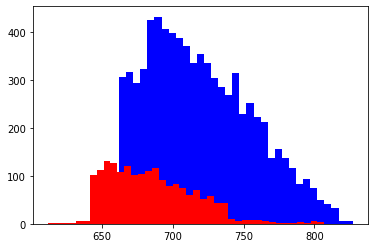

In [30]:
plt.hist(loans[loans['credit.policy']>0]['fico'], bins = 40, color = "blue")
plt.hist(loans[loans['credit.policy']==0]['fico'], bins = 40, color = "red", )

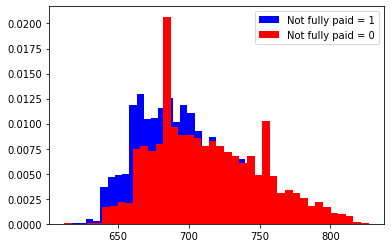

In [41]:
plt.hist(loans[loans['not.fully.paid']>0]['fico'], bins = 40, color = "blue", density = 0.5, label = "Not fully paid = 1")
plt.hist(loans[loans['not.fully.paid']==0]['fico'], bins = 40, color = "red", density = 0.5, label = "Not fully paid = 0")
plt.legend()

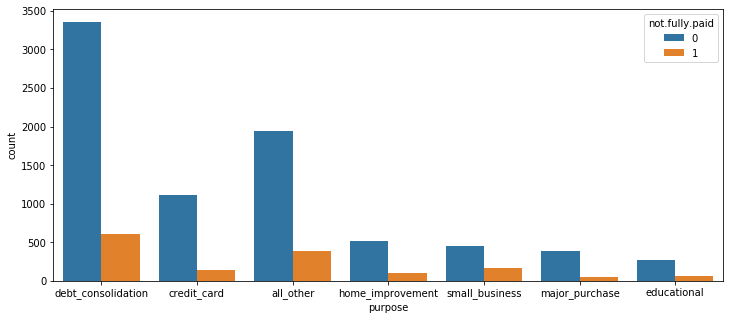

In [42]:
plt.figure(figsize = (12,5))
sb.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans )

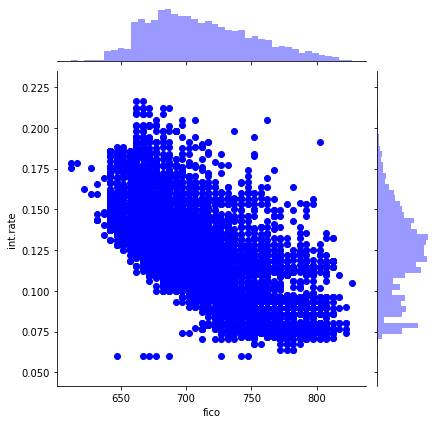

In [43]:
sb.jointplot(x = 'fico', y = 'int.rate', data = loans, color = "blue")

<Figure size 864x360 with 0 Axes>

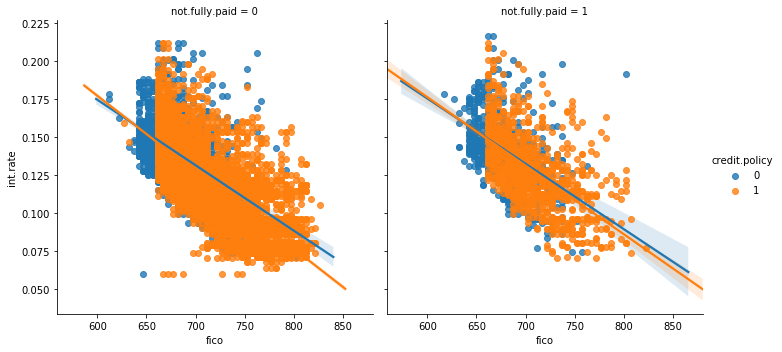

In [44]:
plt.figure (figsize = (12,5))
sb.lmplot(y = 'int.rate' , x = 'fico', hue = 'credit.policy', col = 'not.fully.paid', data = loans)

In [45]:
loans.head(1) 

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0


In [46]:
y = loans ['not.fully.paid']

In [47]:
loans.drop ('purpose', axis = 1, inplace = True)

In [49]:
x = loans

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 100)

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
dt_predictions = dt.predict(x_test)

In [55]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3183
           1       1.00      1.00      1.00       649

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832



In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rf_predict = rf.predict(x_test)

In [60]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3183
           1       1.00      1.00      1.00       649

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832



In [61]:
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
8064,0,0.1091,19.62,9.615805,11.68,692,480.041667,441,73.5,0,0,0,0,1,0,0,0,0,0,0
7262,1,0.1496,173.24,11.289782,13.24,687,2970.000000,11375,87.2,0,0,0,0,0,0,1,0,0,0,0
4120,1,0.1253,669.33,11.589887,15.77,717,12120.000000,33900,56.4,1,0,0,0,0,1,0,0,0,0,0
5087,1,0.1287,201.80,10.778956,0.00,717,4110.000000,0,0.0,2,2,0,0,0,0,0,0,1,0,0
3663,1,0.0800,200.56,11.066576,0.00,807,3960.000000,0,0.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.0838,236.34,11.225243,6.06,742,3149.041667,4286,40.4,0,0,0,0,0,1,0,0,0,0,0
79,1,0.1091,130.79,9.798127,18.00,707,2192.000000,5533,79.6,1,0,0,0,1,0,0,0,0,0,0
8039,0,0.1280,167.99,10.778956,27.60,712,5580.041667,16513,30.9,6,1,0,1,1,0,0,0,0,0,0
6936,1,0.1322,101.41,9.487972,5.82,727,2760.041667,1549,96.8,1,0,0,0,1,0,0,0,0,0,0
